<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/Deep-Learning/blob/master/CNN/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.datasets import mnist
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

Visualizing the dataset

9


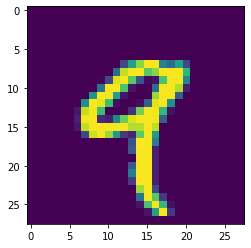

In [0]:
plt.imshow(X_train[4])
print(y_train[4])

Understanding the data

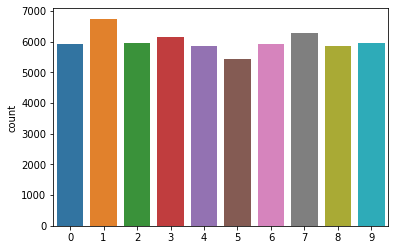

In [0]:
sns.countplot(y_train)

In [0]:
unique, count = np.unique(y_train, return_counts=True)
print(unique)
print(count)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


normalizing our values

In [0]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

Reshaping our array
that last arg is number of channels: 1 means grayscale

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

Building our model

In [0]:
model = Sequential([
                    Conv2D(filters = 32, kernel_size=(5,5),padding='same', input_shape=(28,28,1)),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.3),
                    Conv2D(filters=64, kernel_size=(5,5),padding='same'),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),

                    Flatten(),

                    Dense(256),
                    Activation("relu"),
                    Dropout(0.5),
                    Dense(10),
                    Activation('softmax'),
])


Optimizer choose is rmsprop \
The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate

In [0]:
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

reducing the learning rate by half after 3 epochs if the accuracy doesnot improve 

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [0]:
history=model.fit(X_train, y_train, batch_size=80, epochs=30, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 133s 2ms/step - loss: 0.2052 - accuracy: 0.9351 - val_loss: 0.0413 - val_accuracy: 0.9873
Epoch 2/30
54000/54000 [==============================] - 132s 2ms/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 3/30
54000/54000 [==============================] - 132s 2ms/step - loss: 0.0563 - accuracy: 0.9830 - val_loss: 0.0320 - val_accuracy: 0.9905
Epoch 4/30
54000/54000 [==============================] - 132s 2ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 5/30
54000/54000 [==============================] - 132s 2ms/step - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 6/30
54000/54000 [==============================] - 132s 2ms/step - loss: 0.0406 - accuracy: 0.9887 - val_loss: 0.0314 - val_accuracy: 0.9915
Epoch 7/30
54000/54000 [==============================] - 132s 

It is better to have decreasing leraning rate so as efficientlt reach the gloabal minimum. For this we can use the callback attribute of the keras package

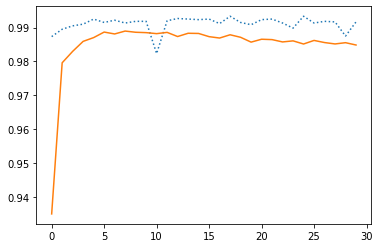

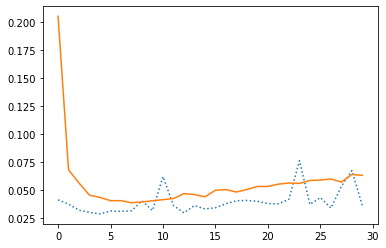

In [0]:
plt.plot(history.history['val_accuracy'], linestyle = 'dotted')
plt.plot(history.history['accuracy'])
plt.show()
plt.plot(history.history['val_loss'], linestyle='dotted')
plt.plot(history.history['loss'])
plt.show()

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history  = model.fit(X_train,y_train, epochs=20, batch_size=80,validation_split = 0.1, callbacks=[learning_rate_reduction])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 134s 2ms/step - loss: 0.0634 - accuracy: 0.9847 - val_loss: 0.0539 - val_accuracy: 0.9877
Epoch 2/20
   80/54000 [..............................] - ETA: 2:07 - loss: 0.0557 - accuracy: 0.9875

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


54000/54000 [==============================] - 134s 2ms/step - loss: 0.0509 - accuracy: 0.9870 - val_loss: 0.0425 - val_accuracy: 0.9902
Epoch 3/20
54000/54000 [==============================] - 134s 2ms/step - loss: 0.0506 - accuracy: 0.9867 - val_loss: 0.0351 - val_accuracy: 0.9922
Epoch 4/20
54000/54000 [==============================] - 134s 2ms/step - loss: 0.0462 - accuracy: 0.9879 - val_loss: 0.0398 - val_accuracy: 0.9920
Epoch 5/20
54000/54000 [==============================] - 133s 2ms/step - loss: 0.0389 - accuracy: 0.9893 - val_loss: 0.0371 - val_accuracy: 0.9930
Epoch 6/20
54000/54000 [==============================] - 133s 2ms/step - loss: 0.0420 - accuracy: 0.9886 - val_loss: 0.0341 - val_accuracy: 0.9915
Epoch 7/20
54000/54000 [==============================] - 133s 2ms/step - loss: 0.0390 - accuracy: 0.9895 - val_loss: 0.0439 - val_accuracy: 0.9917
Epoch 8/20
54000/54000 [==============================] - 133s 2ms/step - loss: 0.0408 - accuracy: 0.9889 - val_loss: 0.035

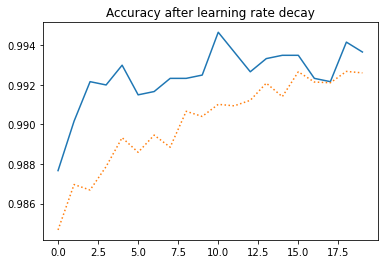

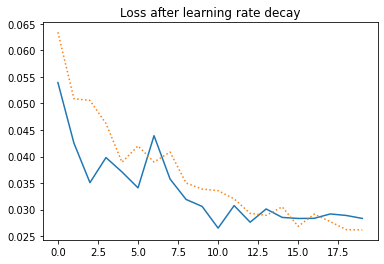

In [0]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'], linestyle='dotted')
plt.title("Accuracy after learning rate decay")
plt.show()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'],linestyle='dotted')
plt.title("Loss after learning rate decay")
plt.show()

Clearly we can see that by decreasing the learning rate after some iterations we have acheieved an accuracy of 99.26% and loss of 2.62% \
The results can be futher enhanced using Data Augmentation. 

In [0]:
y_pred = model.predict(X_test)

In [0]:
score = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 7s 675us/step


In [0]:
print(score)

[0.024490222215987522, 0.9932000041007996]


The test accuracy of the model is 99.32% with loss of 2.4%